In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
from matplotlib import pyplot as plt 
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [24]:
# Load the dataset
df = pd.read_csv('laptop_data.csv')
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [25]:
# drop the unnamed col 
df.drop(columns = ['Unnamed: 0'] , axis = 1 , inplace = True)

In [26]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print(f"Total numerical features: {len(numerical_features)} and they are: {numerical_features} \n")
print(f"Total categorical features: {len(categorical_features)} and they are: {categorical_features}")

Total numerical features: 2 and they are: ['Inches', 'Price'] 

Total categorical features: 9 and they are: ['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight']


In [27]:
df['Weight']= df['Weight'].str.replace("kg" , "")
df['Weight'] = df['Weight'].astype(float) 
df['Ram'] = df['Ram'].str.replace("GB" , "")
df['Ram'] = df['Ram'].astype(int)

In [28]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [29]:
df['ScreenResolution'].unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel 

In [30]:
# Find resX , resY
import re

# Extract resolution using regex
df['resX'] = df['ScreenResolution'].str.extract(r'(\d{3,4})x\d{3,4}').astype(int)
df['resY'] = df['ScreenResolution'].str.extract(r'\d{3,4}x(\d{3,4})').astype(int)

In [31]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,resX,resY
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,2560,1600


In [32]:
# Using Inches , resX and resY make a single feature PPI(Pixel Per Inch)
df['ppi'] = np.sqrt(df['resX']**2 + df['resY']**2) / df['Inches']
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,resX,resY,ppi
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,2560,1600,226.983005


### check how ppi is impacting price

In [33]:
# Null Hypo -> No correlation 
# Alter Hypo -> Has significant correlation 
from scipy.stats import pearsonr
corr, p_value = pearsonr(df['ppi'] , df['Price'])

print(f"Correlation = {corr:.3f} , p-value = {p_value:.5f}")

if p_value < 0.05:
    print("ppi significantly affects Price.")
else:
    print("No significant effect.")

Correlation = 0.473 , p-value = 0.00000
ppi significantly affects Price.


In [34]:
# drop resX , resY
df.drop(columns = ["resX" , "resY" , "Inches"] , axis = 1 , inplace = True)

In [35]:
df.head()

,Company,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,ppi
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,226.983005
1,Apple,Ultrabook,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,127.677940
2,HP,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,141.211998
3,Apple,Ultrabook,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,220.534624
4,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,226.983005


In [37]:
df[df['ScreenResolution'].str.contains('HD')]

,Company,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,ppi
2,HP,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,141.211998
8,Asus,Ultrabook,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16,512GB SSD,Nvidia GeForce MX150,Windows 10,1.30,79653.6000,157.350512
9,Acer,Ultrabook,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.60,41025.6000,157.350512
11,HP,Notebook,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,500GB HDD,Intel HD Graphics 520,No OS,1.86,18381.0672,141.211998
13,Dell,Notebook,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,256GB SSD,AMD Radeon R5 M430,Windows 10,2.20,26581.3920,141.211998
...,...,...,...,...,...,...,...,...,...,...,...
1289,Asus,Ultrabook,IPS Panel Full HD 1920x1080,Intel Core M 6Y30 0.9GHz,8,512GB SSD,Intel HD Graphics 515,Windows 10,1.20,38841.1200,165.632118
1293,Lenovo,Notebook,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8,1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.60,47898.7200,141.211998
1294,HP,Notebook,Full HD 1920x1080,AMD A9-Series 9410 2.9GHz,6,1.0TB Hybrid,AMD Radeon R7 M440,Windows 10,2.04,29303.4672,141.211998
1298,Lenovo,2 in 1 Convertible,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,157.350512


In [40]:
ips = df[df['ScreenResolution'].str.contains('IPS')]

In [41]:
not_ips = df[~df['ScreenResolution'].str.contains('IPS')]

In [43]:
ips['Price'].mean()

74922.01777972601

In [44]:
not_ips['Price'].mean()

54012.93115394456

- IPS type display are more expensive. So make a new feature is_ips

In [46]:
from scipy.stats import ttest_ind

ips_prices = ips['Price']
non_ips_prices = not_ips['Price']

t_stat, p_val = ttest_ind(ips_prices, non_ips_prices)
print(f"T-statistic = {t_stat:.3f}, p-value = {p_val:.5f}")

T-statistic = 9.401, p-value = 0.00000


In [48]:
# make a new feature called is_ips
df['is_ips'] = df['ScreenResolution'].str.contains('IPS' , case=False , na = False).astype(int)

In [49]:
df.head()

,Company,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,ppi,is_ips
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,226.983005,1
1,Apple,Ultrabook,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,127.677940,0
2,HP,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,141.211998,0
3,Apple,Ultrabook,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,220.534624,1
4,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,226.983005,1


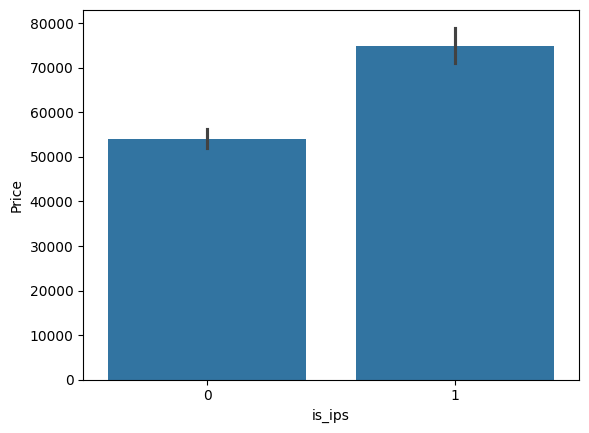

In [56]:
sns.barplot(x = df['is_ips'] , y = df['Price'])
plt.show()

In [51]:
df[df['ScreenResolution'].str.contains('Touchscreen' , case = False , na = False)]

,Company,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,ppi,is_ips
19,Dell,Ultrabook,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,8,128GB SSD,Intel UHD Graphics 620,Windows 10,1.22,52161.12,165.632118,1
23,Dell,2 in 1 Convertible,Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.62,43636.32,165.632118,0
33,Dell,Ultrabook,Touchscreen / Quad HD+ 3200x1800,Intel Core i7 8550U 1.8GHz,16,512GB SSD,Intel UHD Graphics 620,Windows 10,1.20,99580.32,276.053530,0
44,Dell,2 in 1 Convertible,Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,12,1TB HDD,Nvidia GeForce 150MX,Windows 10,2.77,53226.72,127.335675,0
50,Lenovo,2 in 1 Convertible,IPS Panel Touchscreen 1920x1200,Intel Atom x5-Z8550 1.44GHz,4,64GB Flash Storage,Intel HD Graphics 400,Android,0.69,16996.32,224.173809,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1271,Lenovo,2 in 1 Convertible,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.72,276.053530,1
1284,Lenovo,2 in 1 Convertible,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.64,157.350512,1
1285,Lenovo,2 in 1 Convertible,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.72,276.053530,1
1298,Lenovo,2 in 1 Convertible,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.64,157.350512,1


In [52]:
# make a new feature called is_touchscreen
df['is_touchscreen'] = df['ScreenResolution'].str.contains('Touchscreen' , case=False , na = False).astype(int)

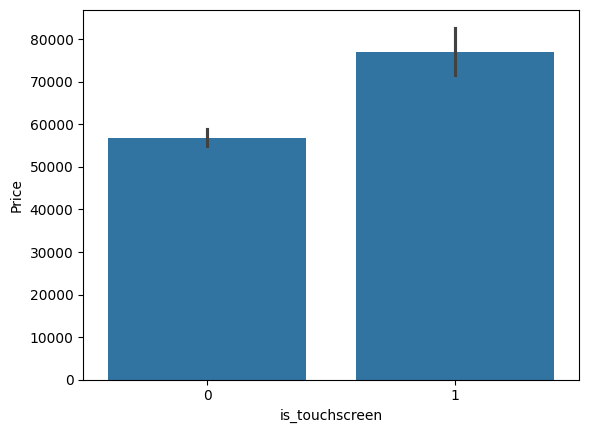

In [57]:
sns.barplot(x = df['is_touchscreen'] , y = df['Price'])
plt.show()

In [53]:
df.head()

,Company,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,ppi,is_ips,is_touchscreen
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,226.983005,1,0
1,Apple,Ultrabook,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,127.677940,0,0
2,HP,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,141.211998,0,0
3,Apple,Ultrabook,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,220.534624,1,0
4,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,226.983005,1,0


In [54]:
# Doing ANOVA test to find significance of touchscreen
from scipy.stats import f_oneway
groups = [df[df['is_touchscreen'] == cat]['Price'] for cat in df['is_touchscreen'].unique()]
f_stat, p_value = f_oneway(*groups)

if p_value < 0.05:
    print("The mean price differs significantly across is_touchscreen.")
else:
    print("No significant difference in mean price across is_touchscreen.")

The mean price differs significantly across is_touchscreen.


In [55]:
df['ScreenResolution'].unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel 

## Now CPU column

In [58]:
df['Cpu'].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

In [59]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [69]:
# make 5 features: Intel Core i7 , Intel Core i5 , Intel Core i3 , Other Intel Processor , AMD Processor
df['Cpu_name'] = df['Cpu'].apply(lambda x: ' '.join(x.split()[0 : 3]))

In [70]:
df.head()

,Company,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,ppi,is_ips,is_touchscreen,Cpu_name
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,226.983005,1,0,Intel Core i5
1,Apple,Ultrabook,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,127.677940,0,0,Intel Core i5
2,HP,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,141.211998,0,0,Intel Core i5
3,Apple,Ultrabook,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,220.534624,1,0,Intel Core i7
4,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,226.983005,1,0,Intel Core i5


In [76]:
def fetch_cpu(text): 
    if text == "Intel Core i5" or text == "Intel Core i7" or text == "Intel Core i3": 
        return text
    if text.split()[0] == "Intel": 
        return "other intel"
    else:
        return 'amd'

In [78]:
df['Cpu_name'] = df['Cpu_name'].apply(fetch_cpu)

In [79]:
df.head()

,Company,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,ppi,is_ips,is_touchscreen,Cpu_name
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,226.983005,1,0,Intel Core i5
1,Apple,Ultrabook,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,127.677940,0,0,Intel Core i5
2,HP,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,141.211998,0,0,Intel Core i5
3,Apple,Ultrabook,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,220.534624,1,0,Intel Core i7
4,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,226.983005,1,0,Intel Core i5


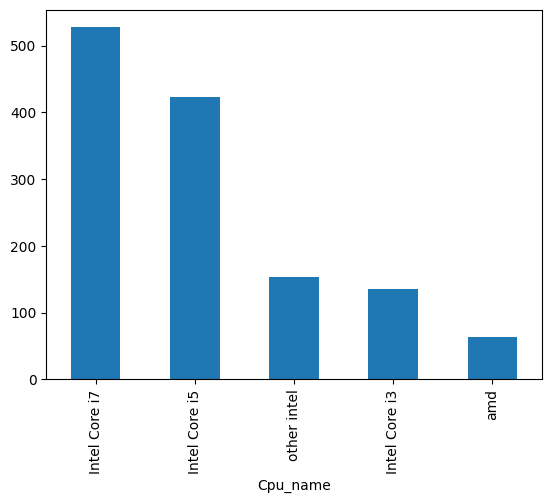

In [80]:
df['Cpu_name'].value_counts().plot(kind = 'bar')
plt.show()

<Axes: xlabel='Cpu_name', ylabel='Price'>

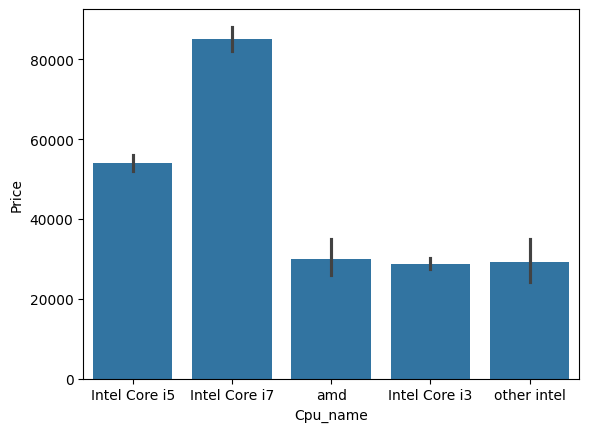

In [81]:
sns.barplot(x = df['Cpu_name'] , y = df['Price'])

In [159]:
df.groupby('Cpu_name')['Price'].mean().sort_values()

Cpu_name
Intel Core i3    28857.830929
other intel      29323.848530
amd              29870.839045
Intel Core i5    54080.012426
Intel Core i7    85023.110883
Name: Price, dtype: float64

In [82]:
df.head()

,Company,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,ppi,is_ips,is_touchscreen,Cpu_name
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,226.983005,1,0,Intel Core i5
1,Apple,Ultrabook,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,127.677940,0,0,Intel Core i5
2,HP,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,141.211998,0,0,Intel Core i5
3,Apple,Ultrabook,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,220.534624,1,0,Intel Core i7
4,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,226.983005,1,0,Intel Core i5


In [83]:
df['Cpu'].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Atom x5-Z8350 1.44GHz',
       'Intel Core i5 7300HQ 2.5GHz', 'AMD E-Series E2-9000e 1.5GHz',
       'Intel Core i5 1.6GHz', 'Intel Core i7 8650U 1.9GHz',
       'Intel Atom x5-Z8300 1.44GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Atom x5-Z8550 1.44GHz',
       'Intel Celeron Du

In [86]:
df['Cpu'].str.split(" ")

0                         [Intel, Core, i5, 2.3GHz]
1                         [Intel, Core, i5, 1.8GHz]
2                  [Intel, Core, i5, 7200U, 2.5GHz]
3                         [Intel, Core, i7, 2.7GHz]
4                         [Intel, Core, i5, 3.1GHz]
                           ...                     
1298               [Intel, Core, i7, 6500U, 2.5GHz]
1299               [Intel, Core, i7, 6500U, 2.5GHz]
1300    [Intel, Celeron, Dual, Core, N3050, 1.6GHz]
1301               [Intel, Core, i7, 6500U, 2.5GHz]
1302    [Intel, Celeron, Dual, Core, N3050, 1.6GHz]
Name: Cpu, Length: 1303, dtype: object

In [88]:
df['Cpu'].str.split(" ").str[-1].str.replace("GHz" , "").astype(float)

0       2.3
1       1.8
2       2.5
3       2.7
4       3.1
       ... 
1298    2.5
1299    2.5
1300    1.6
1301    2.5
1302    1.6
Name: Cpu, Length: 1303, dtype: float64

In [89]:
# make clock speed(GHz)
df['CPU_Speed_GHz'] = df['Cpu'].str.split(" ").str[-1].str.replace("GHz" , "").astype(float)

In [90]:
df.head()

,Company,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,ppi,is_ips,is_touchscreen,Cpu_name,CPU_Speed_GHz
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,226.983005,1,0,Intel Core i5,2.3
1,Apple,Ultrabook,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,127.677940,0,0,Intel Core i5,1.8
2,HP,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,141.211998,0,0,Intel Core i5,2.5
3,Apple,Ultrabook,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,220.534624,1,0,Intel Core i7,2.7
4,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,226.983005,1,0,Intel Core i5,3.1


In [91]:
# now drop both ScreenResolution and Cpu
df.drop(columns = ['ScreenResolution' , 'Cpu'] , axis = 1 , inplace = True)

In [92]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,ppi,is_ips,is_touchscreen,Cpu_name,CPU_Speed_GHz
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,226.983005,1,0,Intel Core i5,2.3
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,127.677940,0,0,Intel Core i5,1.8
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,141.211998,0,0,Intel Core i5,2.5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,220.534624,1,0,Intel Core i7,2.7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,226.983005,1,0,Intel Core i5,3.1


In [93]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [95]:
# make 3 feature from memory: 1. SSD , 2. HDD , 3.Flash , 4.Hybrid 
memory = df['Memory'].str.split('+')
memory

0                 [128GB SSD]
1       [128GB Flash Storage]
2                 [256GB SSD]
3                 [512GB SSD]
4                 [256GB SSD]
                ...          
1298              [128GB SSD]
1299              [512GB SSD]
1300     [64GB Flash Storage]
1301                [1TB HDD]
1302              [500GB HDD]
Name: Memory, Length: 1303, dtype: object

In [97]:
memory.sample(10)

415                   [256GB SSD]
583                   [256GB SSD]
1052                  [256GB SSD]
714                   [512GB SSD]
1253                  [256GB SSD]
349                     [1TB HDD]
57                    [256GB SSD]
468                     [1TB HDD]
599                   [256GB SSD]
347     [512GB SSD ,   256GB SSD]
Name: Memory, dtype: object

In [107]:
import re

def extract_storage(mem_str, storage_type):
    mem_str = str(mem_str).upper()
    size_gb = 0
    
    # Patterns for each type
    if storage_type == 'FLASH':
        pattern = r'(\d+\.?\d*)\s*GB\s*FLASH STORAGE'
    elif storage_type == 'HYBRID':
        pattern = r'(\d+\.?\d*)\s*TB\s*HYBRID|(\d+\.?\d*)\s*GB\s*HYBRID'
    else:
        pattern = rf'(\d+\.?\d*)\s*TB\s*{storage_type}|(\d+\.?\d*)\s*GB\s*{storage_type}'
    
    for match in re.finditer(pattern, mem_str):
        tb, gb = match.groups() if len(match.groups()) == 2 else (None, match.group(1))
        if tb:
            size_gb += float(tb) * 1024
        elif gb:
            size_gb += float(gb)
            
    return size_gb

In [108]:
# Apply to dataframe
df['SSD_GB'] = df['Memory'].apply(lambda x: extract_storage(x, 'SSD'))
df['HDD_GB'] = df['Memory'].apply(lambda x: extract_storage(x, 'HDD'))
df['Flash_GB'] = df['Memory'].apply(lambda x: extract_storage(x, 'FLASH'))
df['Hybrid_GB'] = df['Memory'].apply(lambda x: extract_storage(x, 'HYBRID'))

In [109]:
df[['Memory','SSD_GB','HDD_GB','Flash_GB','Hybrid_GB']].head(20)

,Memory,SSD_GB,HDD_GB,Flash_GB,Hybrid_GB
0,128GB SSD,128.0,0.0,0.0,0.0
1,128GB Flash Storage,0.0,0.0,128.0,0.0
2,256GB SSD,256.0,0.0,0.0,0.0
3,512GB SSD,512.0,0.0,0.0,0.0
4,256GB SSD,256.0,0.0,0.0,0.0
5,500GB HDD,0.0,500.0,0.0,0.0
6,256GB Flash Storage,0.0,0.0,256.0,0.0
7,256GB Flash Storage,0.0,0.0,256.0,0.0
8,512GB SSD,512.0,0.0,0.0,0.0
9,256GB SSD,256.0,0.0,0.0,0.0


In [111]:
df[df['Memory'] == '256GB SSD +  2TB HDD']

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,ppi,is_ips,is_touchscreen,Cpu_name,CPU_Speed_GHz,SSD_GB,HDD_GB,Flash_GB,Hybrid_GB
58,MSI,Gaming,16,256GB SSD + 2TB HDD,Nvidia GeForce GTX 1070,Windows 10,2.43,130482.7200,127.335675,0,0,Intel Core i7,2.8,256.0,2048.0,0.0,0.0
60,Dell,Notebook,16,256GB SSD + 2TB HDD,AMD Radeon 530,Windows 10,2.80,69210.7200,127.335675,0,0,Intel Core i7,1.8,256.0,2048.0,0.0,0.0
121,MSI,Gaming,16,256GB SSD + 2TB HDD,Nvidia GeForce GTX 1070,Windows 10,1.80,119427.1200,141.211998,0,0,Intel Core i7,2.8,256.0,2048.0,0.0,0.0
128,Dell,Notebook,16,256GB SSD + 2TB HDD,AMD Radeon 530,Windows 10,2.80,74378.8800,127.335675,0,0,Intel Core i7,1.8,256.0,2048.0,0.0,0.0
180,Dell,Notebook,16,256GB SSD + 2TB HDD,AMD Radeon 530,Linux,2.02,55890.7200,141.211998,0,0,Intel Core i7,1.8,256.0,2048.0,0.0,0.0
345,Lenovo,Gaming,16,256GB SSD + 2TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.40,60153.1200,141.211998,1,0,Intel Core i7,2.8,256.0,2048.0,0.0,0.0
426,Dell,Notebook,8,256GB SSD + 2TB HDD,AMD Radeon 530,Windows 10,2.02,60867.0720,141.211998,0,0,Intel Core i7,1.8,256.0,2048.0,0.0,0.0
513,Dell,Notebook,16,256GB SSD + 2TB HDD,AMD Radeon 530,Windows 10,2.20,64961.1072,141.211998,0,0,Intel Core i7,1.8,256.0,2048.0,0.0,0.0
605,MSI,Gaming,16,256GB SSD + 2TB HDD,Nvidia GeForce GTX 1060,Windows 10,1.80,122490.7200,282.423996,0,0,Intel Core i7,2.8,256.0,2048.0,0.0,0.0
657,Dell,Notebook,16,256GB SSD + 2TB HDD,AMD Radeon 530,Windows 10,2.20,60472.8000,141.211998,0,0,Intel Core i7,1.8,256.0,2048.0,0.0,0.0


In [112]:
df.drop(columns = ['Memory'] , axis = 1 , inplace = True)

In [113]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,ppi,is_ips,is_touchscreen,Cpu_name,CPU_Speed_GHz,SSD_GB,HDD_GB,Flash_GB,Hybrid_GB
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,226.983005,1,0,Intel Core i5,2.3,128.0,0.0,0.0,0.0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,127.677940,0,0,Intel Core i5,1.8,0.0,0.0,128.0,0.0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,141.211998,0,0,Intel Core i5,2.5,256.0,0.0,0.0,0.0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,220.534624,1,0,Intel Core i7,2.7,512.0,0.0,0.0,0.0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,226.983005,1,0,Intel Core i5,3.1,256.0,0.0,0.0,0.0


In [116]:
df.corr(numeric_only = True)['Price']

Ram               0.743007
Weight            0.210370
Price             1.000000
ppi               0.473487
is_ips            0.252208
is_touchscreen    0.191226
CPU_Speed_GHz     0.430293
SSD_GB            0.670682
HDD_GB           -0.094856
Flash_GB         -0.040511
Hybrid_GB         0.008011
Name: Price, dtype: float64

In [117]:
# as flash and hybrid dont have any high correlation so drop them 
df.drop(columns = ['Flash_GB' , 'Hybrid_GB'] , axis = 1 , inplace = True)

In [119]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [124]:
# extract gpu brand name 
df['gpu_brand'] = df['Gpu'].str.split().str[0]

In [125]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,ppi,is_ips,is_touchscreen,Cpu_name,CPU_Speed_GHz,SSD_GB,HDD_GB,gpu_brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,226.983005,1,0,Intel Core i5,2.3,128.0,0.0,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,127.677940,0,0,Intel Core i5,1.8,0.0,0.0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,141.211998,0,0,Intel Core i5,2.5,256.0,0.0,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,220.534624,1,0,Intel Core i7,2.7,512.0,0.0,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,226.983005,1,0,Intel Core i5,3.1,256.0,0.0,Intel


In [126]:
df.drop(columns = ['Gpu'] , axis = 1 , inplace = True)

In [127]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,ppi,is_ips,is_touchscreen,Cpu_name,CPU_Speed_GHz,SSD_GB,HDD_GB,gpu_brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,226.983005,1,0,Intel Core i5,2.3,128.0,0.0,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,127.677940,0,0,Intel Core i5,1.8,0.0,0.0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,141.211998,0,0,Intel Core i5,2.5,256.0,0.0,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,220.534624,1,0,Intel Core i7,2.7,512.0,0.0,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,226.983005,1,0,Intel Core i5,3.1,256.0,0.0,Intel


<Axes: xlabel='gpu_brand', ylabel='Price'>

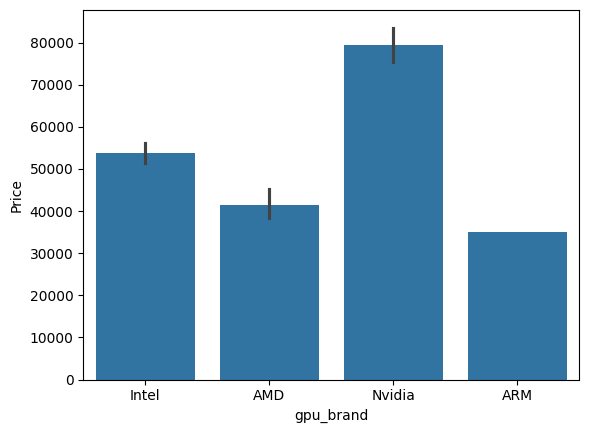

In [128]:
sns.barplot(x = df['gpu_brand'] , y = df['Price'])

In [163]:
df.groupby("gpu_brand")['Price'].mean().sort_values()

gpu_brand
AMD       41326.507680
Intel     53718.258994
Nvidia    79380.500040
Name: Price, dtype: float64

In [129]:
df['gpu_brand'].value_counts()

gpu_brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [131]:
# drop the arm 
arm_index = df[df['gpu_brand'] == 'ARM'].index
df.drop(arm_index , inplace = True)

In [132]:
df.shape

(1302, 14)

In [133]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,ppi,is_ips,is_touchscreen,Cpu_name,CPU_Speed_GHz,SSD_GB,HDD_GB,gpu_brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,226.983005,1,0,Intel Core i5,2.3,128.0,0.0,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,127.677940,0,0,Intel Core i5,1.8,0.0,0.0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,141.211998,0,0,Intel Core i5,2.5,256.0,0.0,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,220.534624,1,0,Intel Core i7,2.7,512.0,0.0,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,226.983005,1,0,Intel Core i5,3.1,256.0,0.0,Intel


In [134]:
# Doing ANOVA test to find significance of OpSys
from scipy.stats import f_oneway
groups = [df[df['OpSys'] == cat]['Price'] for cat in df['OpSys'].unique()]
f_stat, p_value = f_oneway(*groups)

if p_value < 0.05:
    print("The mean price differs significantly across OpSys.")
else:
    print("No significant difference in mean price across OpSys.")

The mean price differs significantly across OpSys.


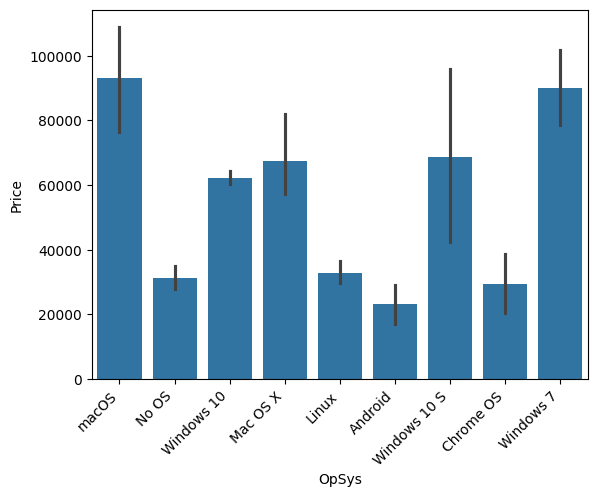

In [136]:
sns.barplot(x = df['OpSys'] , y = df['Price'])
plt.xticks(rotation = 45 , ha = 'right') 
plt.show()

In [137]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [138]:
# make os: windows , mac , Linux , other 
def cat_os(text): 
    text = text.lower()
    
    if 'windows' in text: 
        return 'windows' 
    elif 'linux' in text: 
        return 'linux' 
    elif 'mac' in text: 
        return 'mac' 
    else:
        return 'other'

In [142]:
df['OpSys'] = df['OpSys'].apply(cat_os)

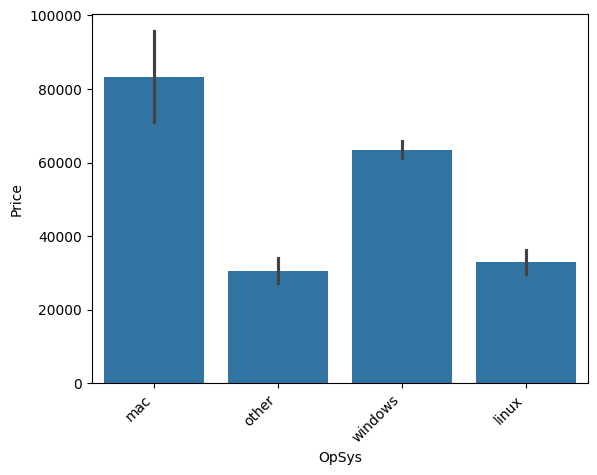

In [143]:
sns.barplot(x = df['OpSys'] , y = df['Price'])
plt.xticks(rotation = 45 , ha = 'right') 
plt.show()

In [162]:
df.groupby("OpSys")['Price'].mean().sort_values()

OpSys
other      30586.143523
linux      32877.429445
windows    63388.360691
mac        83340.499886
Name: Price, dtype: float64

In [164]:
df.groupby("TypeName")['Price'].mean().sort_values()

TypeName
Netbook                33898.440960
Notebook               41669.149113
2 in 1 Convertible     68603.150400
Ultrabook              82489.713429
Gaming                 92247.960187
Workstation           121497.525683
Name: Price, dtype: float64

In [165]:
df.groupby("Company")['Price'].mean().sort_values()

Company
Vero          11584.404000
Mediacom      15717.600000
Chuwi         16745.726400
Acer          33394.615969
Fujitsu       38841.120000
HP            56891.044222
Lenovo        57882.563200
Asus          58830.143878
Xiaomi        60390.882000
Dell          63193.755782
Toshiba       67549.050000
Huawei        75870.720000
Samsung       80332.920000
Apple         83340.499886
Microsoft     85903.788000
Google        89386.080000
MSI           92116.226133
LG           111834.720000
Razer        178282.491429
Name: Price, dtype: float64

In [144]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,ppi,is_ips,is_touchscreen,Cpu_name,CPU_Speed_GHz,SSD_GB,HDD_GB,gpu_brand
0,Apple,Ultrabook,8,mac,1.37,71378.6832,226.983005,1,0,Intel Core i5,2.3,128.0,0.0,Intel
1,Apple,Ultrabook,8,mac,1.34,47895.5232,127.677940,0,0,Intel Core i5,1.8,0.0,0.0,Intel
2,HP,Notebook,8,other,1.86,30636.0000,141.211998,0,0,Intel Core i5,2.5,256.0,0.0,Intel
3,Apple,Ultrabook,16,mac,1.83,135195.3360,220.534624,1,0,Intel Core i7,2.7,512.0,0.0,AMD
4,Apple,Ultrabook,8,mac,1.37,96095.8080,226.983005,1,0,Intel Core i5,3.1,256.0,0.0,Intel


<Axes: >

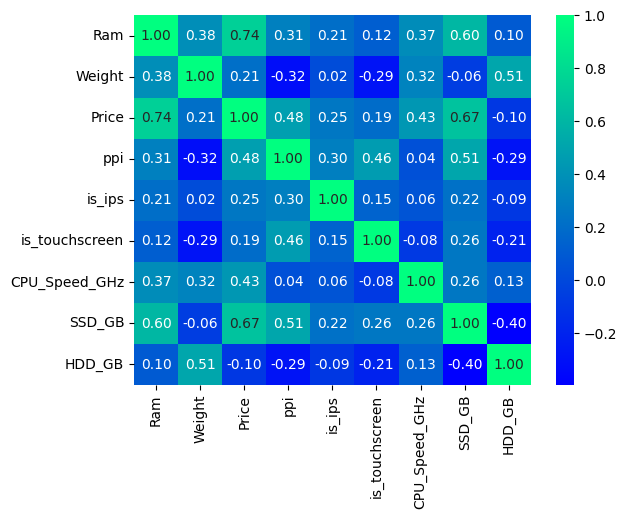

In [146]:
sns.heatmap(df.corr(numeric_only = True) , annot = True , fmt = ".2f" , cmap = 'winter')

<Axes: xlabel='Price', ylabel='Count'>

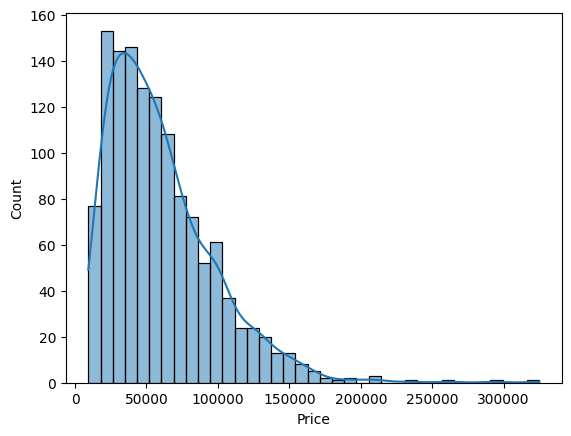

In [147]:
sns.histplot(df['Price'] , kde = True)

<Axes: xlabel='Price', ylabel='Count'>

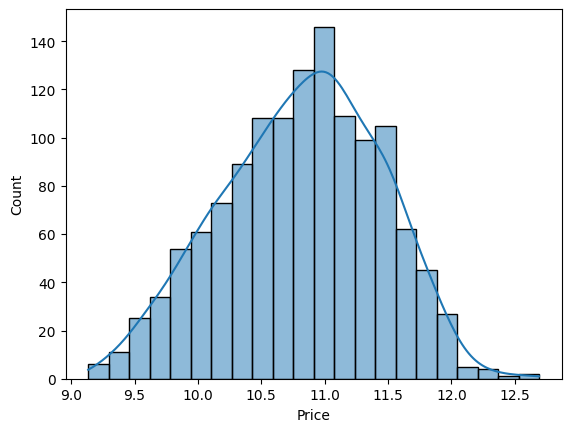

In [148]:
sns.histplot(np.log(df['Price']) , kde = True)

## Seperate X and y

In [152]:
X = df.drop(columns = ['Price'] , axis = 1)
y = df['Price']
y = np.log(y)

In [153]:
X.head()

,Company,TypeName,Ram,OpSys,Weight,ppi,is_ips,is_touchscreen,Cpu_name,CPU_Speed_GHz,SSD_GB,HDD_GB,gpu_brand
0,Apple,Ultrabook,8,mac,1.37,226.983005,1,0,Intel Core i5,2.3,128.0,0.0,Intel
1,Apple,Ultrabook,8,mac,1.34,127.677940,0,0,Intel Core i5,1.8,0.0,0.0,Intel
2,HP,Notebook,8,other,1.86,141.211998,0,0,Intel Core i5,2.5,256.0,0.0,Intel
3,Apple,Ultrabook,16,mac,1.83,220.534624,1,0,Intel Core i7,2.7,512.0,0.0,AMD
4,Apple,Ultrabook,8,mac,1.37,226.983005,1,0,Intel Core i5,3.1,256.0,0.0,Intel


In [154]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

In [155]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)

In [156]:
X_train.shape

(1041, 13)

In [157]:
X_test.shape

(261, 13)

In [166]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,ppi,is_ips,is_touchscreen,Cpu_name,CPU_Speed_GHz,SSD_GB,HDD_GB,gpu_brand
0,Apple,Ultrabook,8,mac,1.37,71378.6832,226.983005,1,0,Intel Core i5,2.3,128.0,0.0,Intel
1,Apple,Ultrabook,8,mac,1.34,47895.5232,127.677940,0,0,Intel Core i5,1.8,0.0,0.0,Intel
2,HP,Notebook,8,other,1.86,30636.0000,141.211998,0,0,Intel Core i5,2.5,256.0,0.0,Intel
3,Apple,Ultrabook,16,mac,1.83,135195.3360,220.534624,1,0,Intel Core i7,2.7,512.0,0.0,AMD
4,Apple,Ultrabook,8,mac,1.37,96095.8080,226.983005,1,0,Intel Core i5,3.1,256.0,0.0,Intel


In [167]:
df.shape

(1302, 14)

## Saving data in csv format for appling and train different different model experiments

In [168]:
df.to_csv("laptop_data_featured.csv", index=False)